# Ingenieria de atributos

In [11]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns

Cantidad de filas en el dataset: 1523221

Porcentaje de clics (1) y no clics (0):
Label
0    98.566918
1     1.433082
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    1501392
1      21829
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


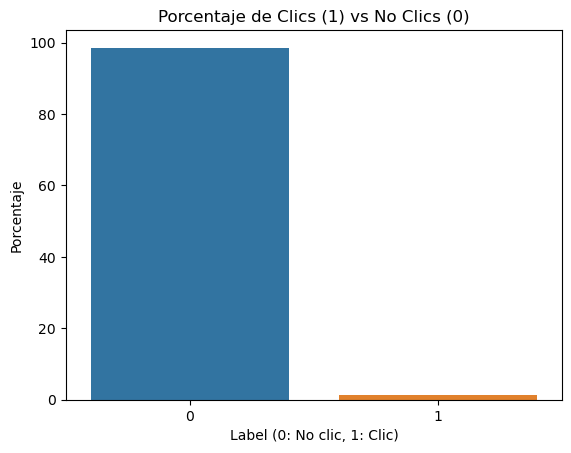


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0061
auction_bidfloor: Correlación con Label = 0.0880
auction_time: Correlación con Label = -0.0197
creative_height: Correlación con Label = 0.1085
creative_width: Correlación con Label = 0.0576
timezone_offset: Correlación con Label = 0.0240

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.991519  0.008481
604d011f              0.977846  0.022154
6b5513a4              0.978230  0.021770
7f02cacc              0.988586  0.011414
9915ffee              0.986867  0.013133
c186959e              0.840409  0.159591
c202ab08              0.991081  0.008919
c2e4f717              0.994273  0.005727
e350c7c7              0.984131  0.015869
Cantidad de filas por categorías en action_categorical_0:
action_categor

In [12]:
# Cargar los datos de entrenamiento
train_data_21 = pd.read_csv("data/ctr_21.csv")

# Imprimir la cantidad de filas del dataset
print(f"Cantidad de filas en el dataset: {train_data_21.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_21['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_21['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_21.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_21.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_21[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_21.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_21.groupby(feature)['Label'].size())

Cantidad de filas en el dataset: 1356066

Porcentaje de clics (1) y no clics (0):
Label
0    98.493731
1     1.506269
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    1335640
1      20426
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


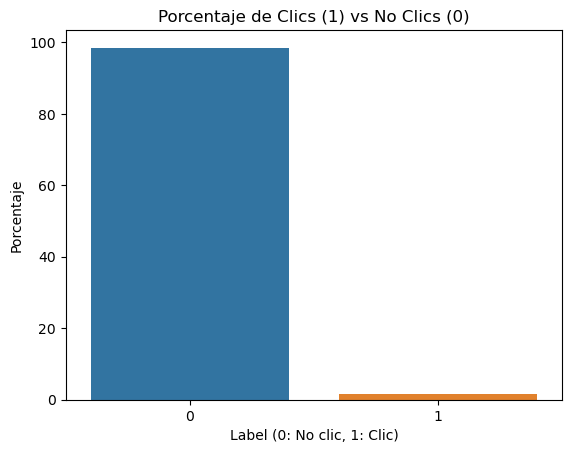


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0067
auction_bidfloor: Correlación con Label = 0.0863
auction_time: Correlación con Label = -0.0179
creative_height: Correlación con Label = 0.1031
creative_width: Correlación con Label = 0.0602
timezone_offset: Correlación con Label = 0.0258

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.990711  0.009289
604d011f              0.979335  0.020665
6b5513a4              0.975761  0.024239
7f02cacc              0.987924  0.012076
9915ffee              0.986712  0.013288
c186959e              0.840936  0.159064
c202ab08              0.992327  0.007673
c2e4f717              0.991343  0.008657
e350c7c7              0.983703  0.016297
Cantidad de filas por categorías en action_categorical_0:
action_categor

In [13]:
# Cargar los datos de entrenamiento
train_data_20 = pd.read_csv("data/ctr_20.csv")

# Imprimir la cantidad de filas del dataset
print(f"Cantidad de filas en el dataset: {train_data_20.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_20['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_20['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_20.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_20.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_20[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_20.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_20.groupby(feature)['Label'].size())

Cantidad de filas en el dataset: 1326180

Porcentaje de clics (1) y no clics (0):
Label
0    98.535644
1     1.464356
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    1306760
1      19420
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


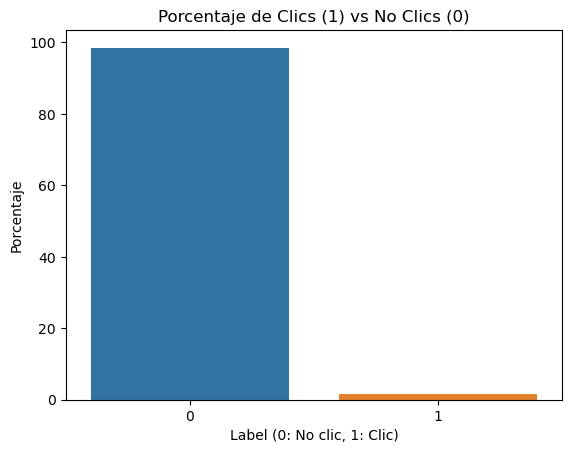


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0093
auction_bidfloor: Correlación con Label = 0.0825
auction_time: Correlación con Label = 0.0089
creative_height: Correlación con Label = 0.0862
creative_width: Correlación con Label = 0.0479
timezone_offset: Correlación con Label = 0.0346

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.991731  0.008269
604d011f              0.975146  0.024854
6b5513a4              0.976321  0.023679
7f02cacc              0.987786  0.012214
9915ffee              0.987787  0.012213
c186959e              0.848703  0.151297
c202ab08              0.992305  0.007695
c2e4f717              0.991568  0.008432
e350c7c7              0.983370  0.016630
Cantidad de filas por categorías en action_categorical_0:
action_categori

In [14]:
# Cargar los datos de entrenamiento
train_data_19 = pd.read_csv("data/ctr_19.csv")

# Imprimir la cantidad de filas del dataset
print(f"Cantidad de filas en el dataset: {train_data_19.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_19['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_19['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_19.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_19.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_19[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_19.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_19.groupby(feature)['Label'].size())

Cantidad de filas en el dataset: 1013581

Porcentaje de clics (1) y no clics (0):
Label
0    98.998403
1     1.001597
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    1003429
1      10152
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


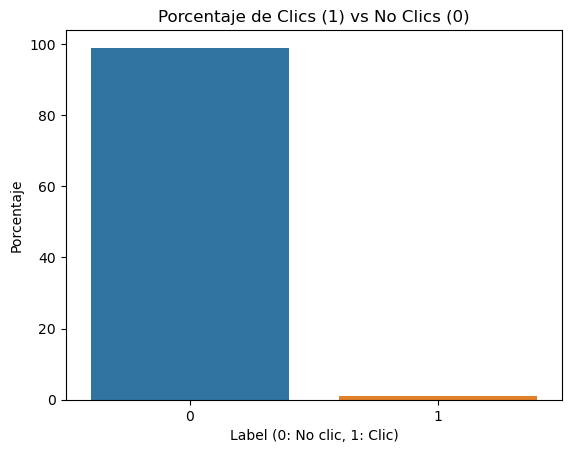


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0075
auction_bidfloor: Correlación con Label = 0.1040
auction_time: Correlación con Label = 0.0015
creative_height: Correlación con Label = 0.0887
creative_width: Correlación con Label = 0.0256
timezone_offset: Correlación con Label = 0.0036

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.991904  0.008096
604d011f              1.000000       NaN
6b5513a4              0.977787  0.022213
7f02cacc              0.987856  0.012144
9915ffee              0.990254  0.009746
c186959e              0.839240  0.160760
c202ab08              0.992167  0.007833
c2e4f717              0.992090  0.007910
e350c7c7              0.984091  0.015909
Cantidad de filas por categorías en action_categorical_0:
action_categori

In [15]:
# Cargar los datos de entrenamiento
train_data_18 = pd.read_csv("data/ctr_18.csv")

# Imprimir la cantidad de filas del dataset
print(f"Cantidad de filas en el dataset: {train_data_18.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_18['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_18['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_18.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_18.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_18[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_18.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_18.groupby(feature)['Label'].size())

Cantidad de filas en el dataset: 1093607

Porcentaje de clics (1) y no clics (0):
Label
0    99.031462
1     0.968538
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    1083015
1      10592
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


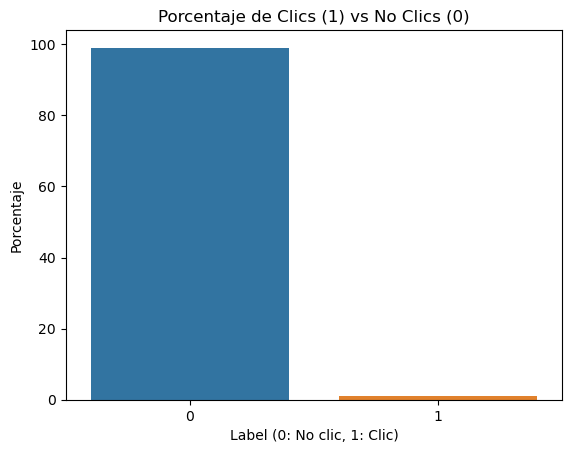


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0105
auction_bidfloor: Correlación con Label = 0.0992
auction_time: Correlación con Label = 0.0036
creative_height: Correlación con Label = 0.0903
creative_width: Correlación con Label = 0.0202
timezone_offset: Correlación con Label = 0.0122

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.991825  0.008175
604d011f              0.980108  0.019892
6b5513a4              0.977371  0.022629
7f02cacc              0.988046  0.011954
9915ffee              0.992446  0.007554
c186959e              0.849438  0.150562
c202ab08              0.991431  0.008569
c2e4f717              0.992310  0.007690
e350c7c7              0.984419  0.015581
Cantidad de filas por categorías en action_categorical_0:
action_categori

In [20]:
# Cargar los datos de entrenamiento
train_data_17 = pd.read_csv("data/ctr_17.csv")

# Imprimir la cantidad de filas del dataset
print(f"Cantidad de filas en el dataset: {train_data_17.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_17['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_17['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_17.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_17.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_17[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_17.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_17.groupby(feature)['Label'].size())

Cantidad de filas en el dataset: 1092413

Porcentaje de clics (1) y no clics (0):
Label
0    99.04267
1     0.95733
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    1081955
1      10458
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


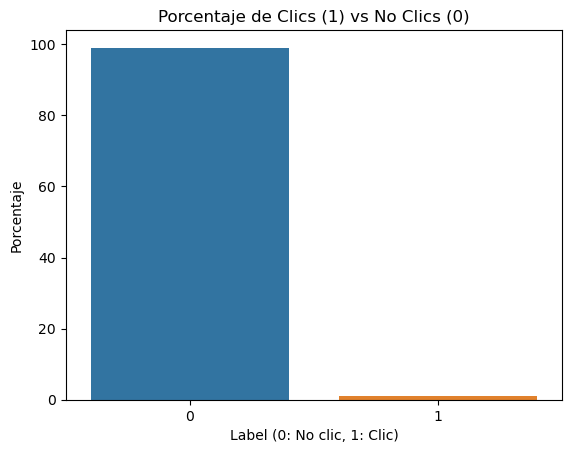


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0099
auction_bidfloor: Correlación con Label = 0.1028
auction_time: Correlación con Label = -0.0026
creative_height: Correlación con Label = 0.0977
creative_width: Correlación con Label = 0.0167
timezone_offset: Correlación con Label = 0.0104

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.992477  0.007523
6b5513a4              0.978727  0.021273
7f02cacc              0.984911  0.015089
9915ffee              0.991830  0.008170
c186959e              0.852027  0.147973
c202ab08              0.991996  0.008004
c2e4f717              0.991443  0.008557
e350c7c7              0.984959  0.015041
Cantidad de filas por categorías en action_categorical_0:
action_categorical_0
11b7af3d    285538
6b5513a4     22

In [19]:
# Cargar los datos de entrenamiento
train_data_16 = pd.read_csv("data/ctr_16.csv")

# Imprimir la cantidad de filas del dataset
print(f"Cantidad de filas en el dataset: {train_data_16.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_16['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_16['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_16.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_16.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_16[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_16.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_16.groupby(feature)['Label'].size())

Cantidad de filas en el dataset: 1239524

Porcentaje de clics (1) y no clics (0):
Label
0    98.979205
1     1.020795
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    1226871
1      12653
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


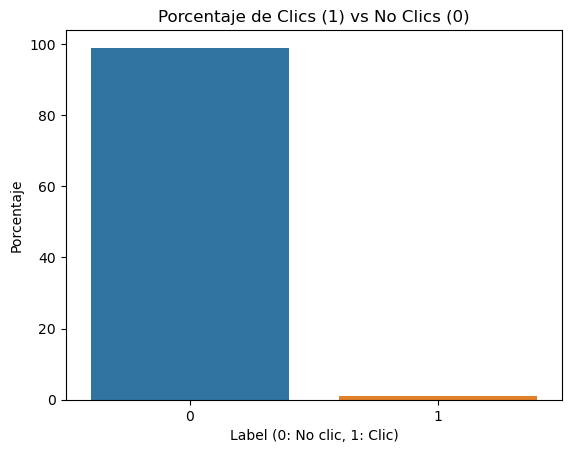


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0087
auction_bidfloor: Correlación con Label = 0.0835
auction_time: Correlación con Label = 0.0026
creative_height: Correlación con Label = 0.0880
creative_width: Correlación con Label = 0.0233
timezone_offset: Correlación con Label = 0.0142

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.991903  0.008097
604d011f              0.987711  0.012289
6b5513a4              0.980133  0.019867
7f02cacc              0.988044  0.011956
9915ffee              0.992443  0.007557
c186959e              0.852785  0.147215
c202ab08              0.991612  0.008388
c2e4f717              0.992039  0.007961
e350c7c7              0.984630  0.015370
Cantidad de filas por categorías en action_categorical_0:
action_categori

In [21]:
# Cargar los datos de entrenamiento
train_data_15 = pd.read_csv("data/ctr_15.csv")

# Imprimir la cantidad de filas del dataset
print(f"Cantidad de filas en el dataset: {train_data_15.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_15['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_15['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_15.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_15.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_15[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_15.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_15.groupby(feature)['Label'].size())

Cantidad de filas en el dataset combinado: 8644592

Porcentaje de clics (1) y no clics (0):
Label
0    98.779237
1     1.220763
Name: proportion, dtype: float64

Cantidad de clics (1) y no clics (0):
Label
0    8539062
1     105530
Name: count, dtype: int64


/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucamazzarello_/opt/anaconda3/envs/TDVI/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


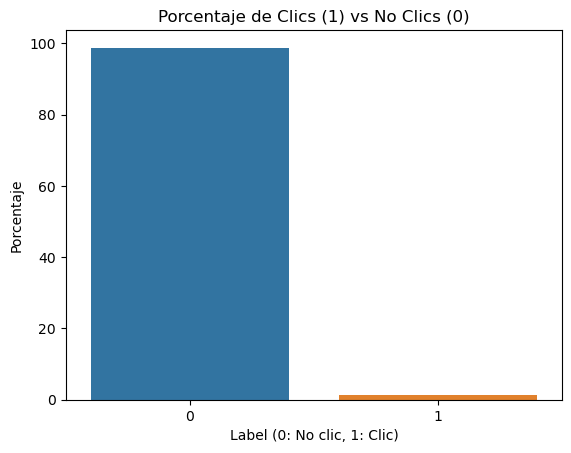


Correlación de atributos numéricos con Label:
auction_age: Correlación con Label = -0.0084
auction_bidfloor: Correlación con Label = 0.0900
auction_time: Correlación con Label = 0.0180
creative_height: Correlación con Label = 0.0965
creative_width: Correlación con Label = 0.0388
timezone_offset: Correlación con Label = 0.0239

Relación de atributos categóricos con Label (distribución de Label por categoría):

Distribución de Label por categorías en action_categorical_0:
Label                        0         1
action_categorical_0                    
11b7af3d              0.991758  0.008242
604d011f              0.979104  0.020896
6b5513a4              0.977820  0.022180
7f02cacc              0.987663  0.012337
9915ffee              0.989841  0.010159
c186959e              0.846106  0.153894
c202ab08              0.991751  0.008249
c2e4f717              0.992170  0.007830
e350c7c7              0.984162  0.015838
Cantidad de filas por categorías en action_categorical_0:
action_categori

In [22]:
train_data_combined = pd.concat([train_data_21, train_data_20, train_data_19, train_data_18, train_data_17, train_data_16, train_data_15], axis=0)

# Imprimir la cantidad de filas del dataset combinado
print(f"Cantidad de filas en el dataset combinado: {train_data_combined.shape[0]}")

# Ver porcentaje de clics vs no clics en la columna Label
label_counts = train_data_combined['Label'].value_counts(normalize=True) * 100
print("\nPorcentaje de clics (1) y no clics (0):")
print(label_counts)

# Cantidad de clics (1) y no clics (0)
label_counts_abs = train_data_combined['Label'].value_counts()
print("\nCantidad de clics (1) y no clics (0):")
print(label_counts_abs)

# Visualización
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Porcentaje de Clics (1) vs No Clics (0)")
plt.ylabel("Porcentaje")
plt.xlabel("Label (0: No clic, 1: Clic)")
plt.show()

# Dividir los datos en numéricos y categóricos
numeric_features = train_data_combined.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data_combined.select_dtypes(include=['object']).columns.tolist()

# Relación de cada atributo numérico con la columna Label
print("\nCorrelación de atributos numéricos con Label:")
for feature in numeric_features:
    if feature != 'Label':
        correlation = train_data_combined[[feature, 'Label']].corr().iloc[0, 1]
        print(f"{feature}: Correlación con Label = {correlation:.4f}")

# Relación de cada atributo categórico con la columna Label
print("\nRelación de atributos categóricos con Label (distribución de Label por categoría):")
for feature in categorical_features:
    if feature != 'Label':
        print(f"\nDistribución de Label por categorías en {feature}:")
        print(train_data_combined.groupby(feature)['Label'].value_counts(normalize=True).unstack())
        # También mostrar la cantidad de filas por categoría
        print(f"Cantidad de filas por categorías en {feature}:")
        print(train_data_combined.groupby(feature)['Label'].size())